## Description
### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

## Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the file with pandas:
customer_data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

In [3]:
# viewing a sample of the data: 
customer_data.sample(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
169,170,54281,14000,3,1,4,7
73,74,18821,19000,3,1,3,6
577,578,67637,44000,5,3,0,4
383,384,19215,18000,5,3,1,3
325,326,92782,14000,4,4,2,3


In [4]:
customer_data.shape

(660, 7)

In [5]:
customer_data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
customer_data.duplicated().sum()

0

In [8]:
customer_data[customer_data['Customer Key'].duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [9]:
customer_data[customer_data['Customer Key']==97935]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


- This is an indication that some customers have more than one account type with the bank (reason could be to increase his/her credit limit).

In [10]:
# Dropping the SI_No feature:
customer_data.drop('Sl_No', axis=1, inplace=True)

In [11]:
customer_data.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


- Minimum and maximum credit limit is 3,000 and 200,000.
- Minimum and maximum credit cards owned is 1 and 10.
- Total physical bank visit ranges from 0 to 5.
- Total online bank visit ranges from 0 to 15.
- Total calls made to bank ranges from 0 to 10.

## Exploratory Data Analysis:

In [12]:
#from My_Utils import (barplot_func, catplot_func, plot_percent_weight, countplot_func)

In [13]:
customer_data.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

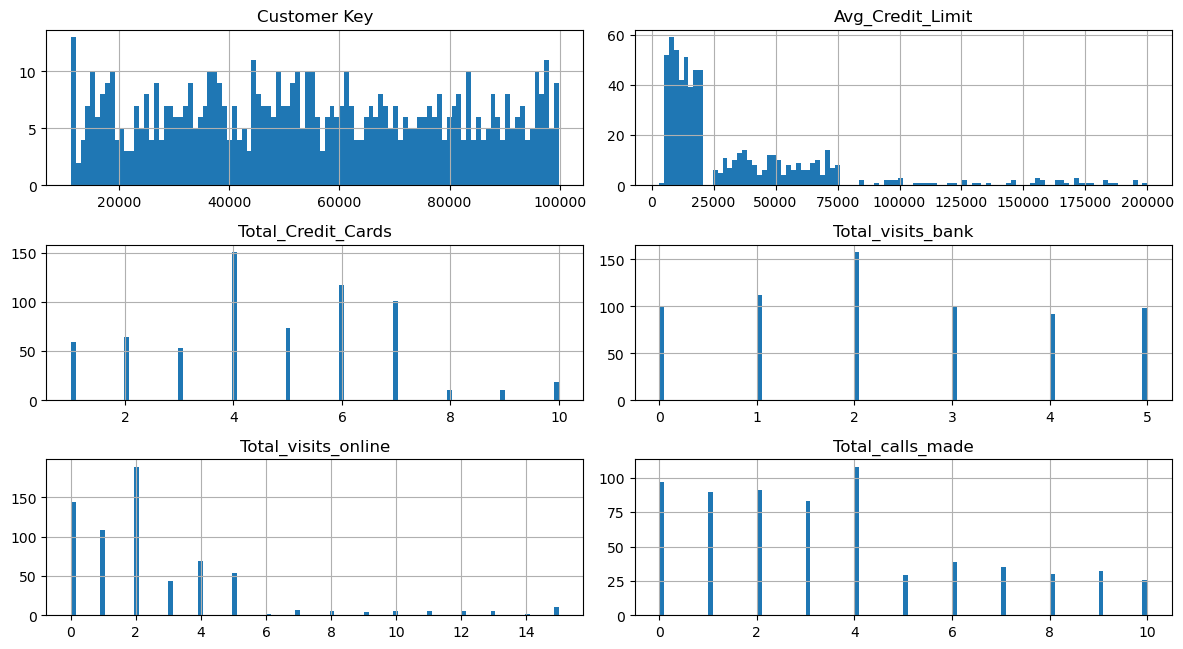

In [14]:
list_ = customer_data.columns
customer_data[list_].hist(stacked = False, bins = 100, figsize=(12,30), layout=(14,2));

plt.tight_layout()

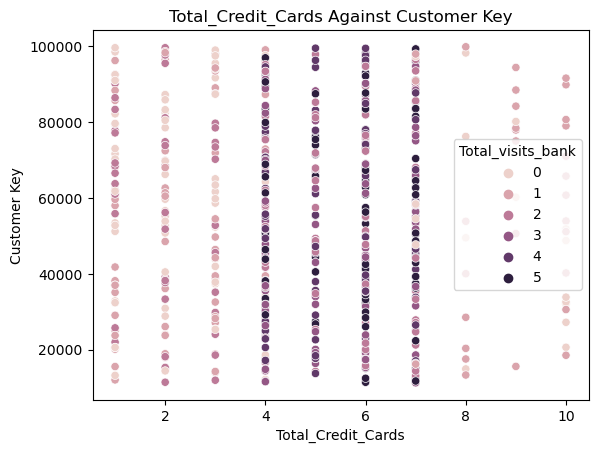

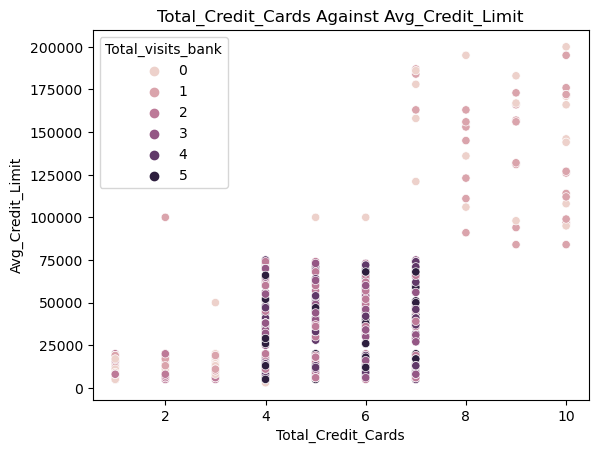

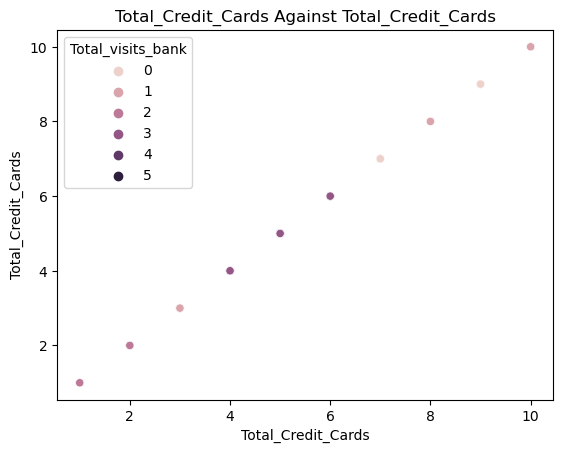

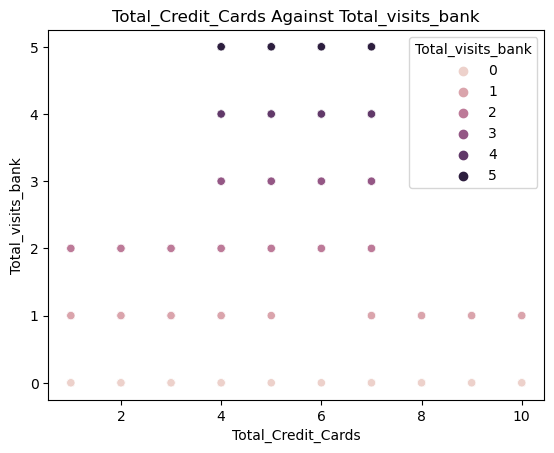

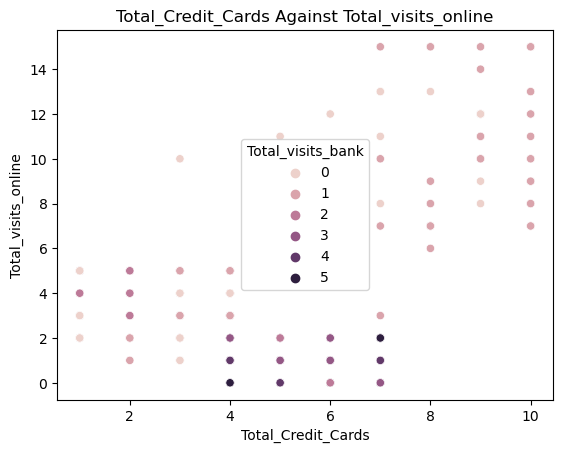

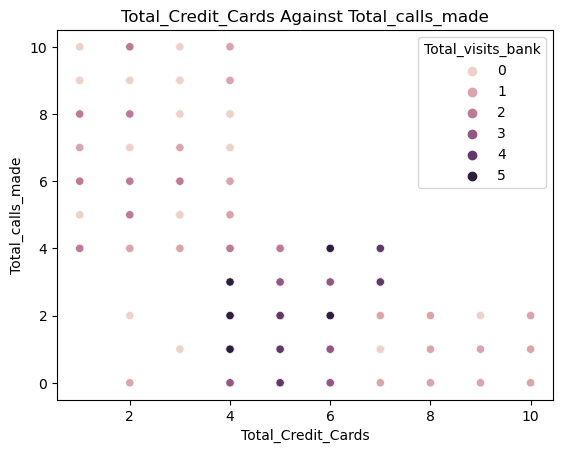

In [15]:
for cols in customer_data.columns:
    sns.scatterplot(data=customer_data, x='Total_Credit_Cards', y=cols, hue='Total_visits_bank')
    plt.title(f'Total_Credit_Cards Against {cols}')
    plt.show()

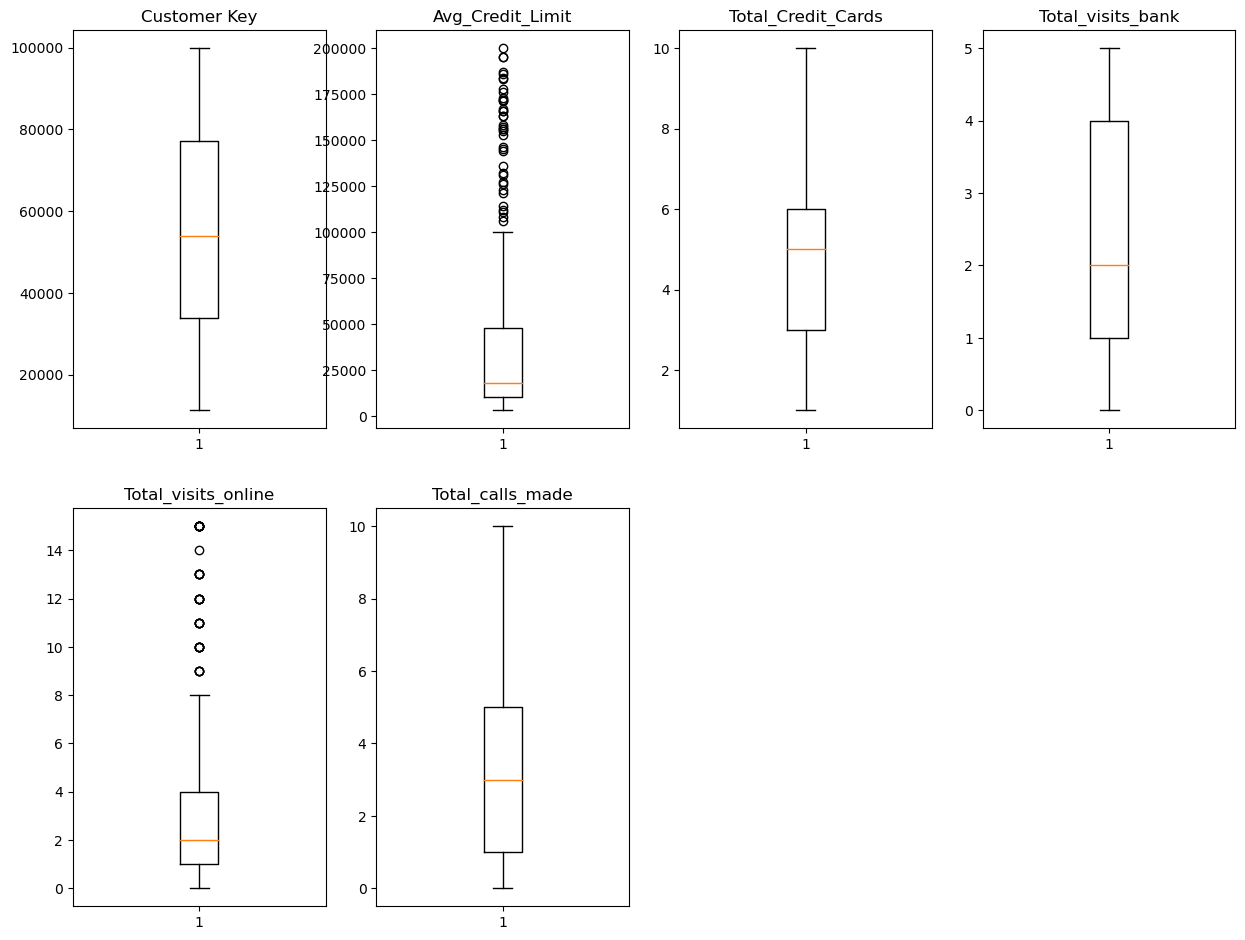

In [16]:
plt.figure(figsize=(15,30))
for features,entry in zip(customer_data.columns,range(0,len(customer_data.columns))):
    plt.subplot(5,4,entry+1)
    plt.boxplot(customer_data[features])
    plt.title(features)
plt.show()

- Outliers in Average credit limit and Total visits online indicates few customers have a larger credit limit and contacted the bank online.
- For the sake of clustering, these values will be taken care of with clustering algorithms below.

## Clustering Algorithm:

In [17]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

# Internal Measures:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# External Measures:
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score

from sklearn.preprocessing import (MinMaxScaler, StandardScaler)

In [18]:
# Function to evaluate KMeans:
def internal_measure_KMeans(data,k):
    '''
    Used for evaluating KMeans performance.
    data: Dataframe
    k: No of clusters in integers
    '''
    kmeans = KMeans(n_clusters=k,n_init='auto',random_state=42)
    clusters = kmeans.fit_predict(data)
    # Calculate the Davies-Bouldin index:
    db_score = davies_bouldin_score(data,clusters)

    # Calculate the Silhouette coefficient:
    s_score = silhouette_score(data,clusters)

    # Calculate Calinski Harabasz Score:
    c_score = calinski_harabasz_score(data,clusters)
   
    internal_measure_df = pd.DataFrame({'Davies-Bouldin Index':f'{db_score:.3f}','Silhouette Coeff':f'{s_score:.3f}',\
                                       'Calinski Harabasz Score':f'{c_score:.3f}'},index=['Result'])
    return internal_measure_df

In [41]:
# Function to evaluate DBSCAN:
def internal_measure_DBSCAN(data,eps,min_samples):
    '''
    Used for evaluating DBSCAN performance.
    data: Dataframe
    eps: Maximum distance between data points.
    min_samples: least number of points in a cluster.
    '''
    db_model = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = db_model.fit_predict(data)

    # Calculate the Davies-Bouldin index:
    db_score = davies_bouldin_score(data,clusters)

    # Calculate the Silhouette coefficient:
    s_score = silhouette_score(data,clusters)

    # Calculate Calinski Harabasz Score:
    c_score = calinski_harabasz_score(data,clusters)
   
    internal_measure_df = pd.DataFrame({'Davies-Bouldin Index':f'{db_score:.3f}','Silhouette Coeff':f'{s_score:.3f}',\
                                       'Calinski Harabasz Score':f'{c_score:.3f}'},index=['Result'])
    return internal_measure_df

In [20]:
# Rescaling the data:
scaler = MinMaxScaler()
customer_data_scaled = scaler.fit_transform(customer_data.values)
customer_data_scaled = pd.DataFrame(customer_data_scaled, columns=customer_data.columns)

In [21]:
customer_data_scaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.855833,0.492386,0.111111,0.2,0.066667,0.0
1,0.306498,0.238579,0.222222,0.0,0.666667,0.9
2,0.068595,0.238579,0.666667,0.2,0.200000,0.4
3,0.330003,0.137056,0.444444,0.2,0.066667,0.4
4,0.408363,0.492386,0.555556,0.0,0.800000,0.3


### KMeans Clustering

#### Finding Optimal number of clusters, k:

In [22]:
Db_score = []
sil_coeff = []
range_ = range(3,20)
for n_clusters in range_:
    df = internal_measure_KMeans(data=customer_data_scaled, k=n_clusters)
    Db_score.append(df.loc['Result','Davies-Bouldin Index'])
    sil_coeff.append(df.loc['Result','Silhouette Coeff'])
performance_df = pd.DataFrame({'No of Clusters(k)':range_,'Db_Score':Db_score,'Sil_coeff':sil_coeff})

performance_df['Db_Score'] = performance_df['Db_Score'].astype(float)
performance_df['Sil_coeff'] = performance_df['Sil_coeff'].astype(float)

performance_df

,No of Clusters(k),Db_Score,Sil_coeff
0,3,1.202,0.270
1,4,1.049,0.348
2,5,1.202,0.297
3,6,1.304,0.283
4,7,1.286,0.267
5,8,1.337,0.246
6,9,1.348,0.250
7,10,1.451,0.238
8,11,1.496,0.216
9,12,1.527,0.202


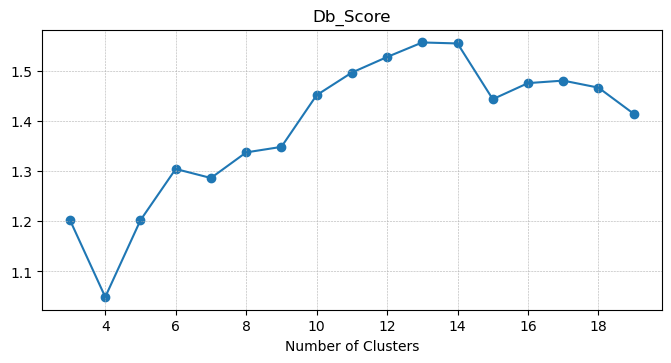

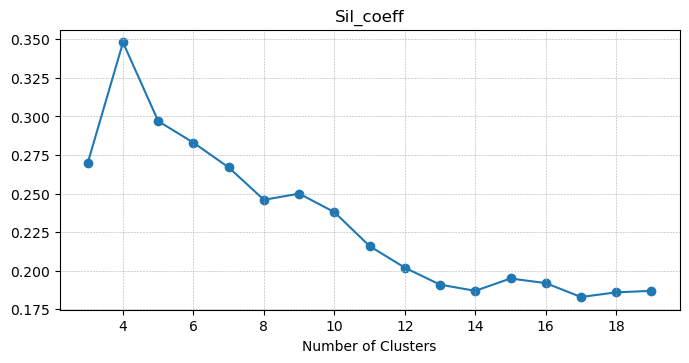

In [23]:
for feature in performance_df.drop('No of Clusters(k)',axis=1):
    i=0
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,i+1)
    plt.scatter(data=performance_df, x='No of Clusters(k)', y=feature)
    plt.plot(performance_df['No of Clusters(k)'],performance_df[feature])
    plt.title(feature)
    plt.xlabel('Number of Clusters')
    plt.grid(linestyle='--',linewidth=0.4)
    i=i+1
    plt.show()

- As seen, 4 clusters gave the highest silhoutte score (0.418) and smallest David-Boulden index of 0.893. Hence optimum number of clusters is 3.

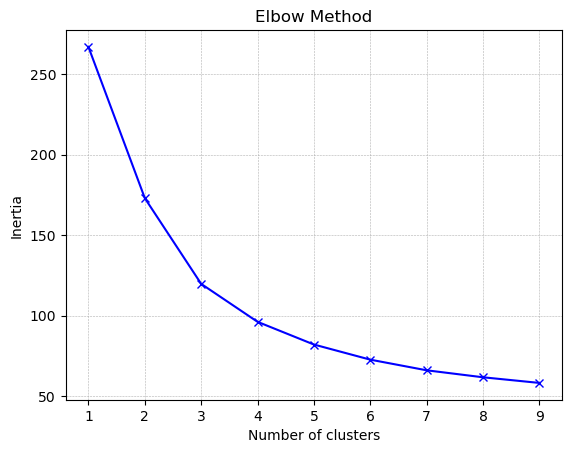

In [24]:
# Attempting Elbow Method to determine number of clusters:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(linestyle='--',linewidth=0.4)
plt.show()

- Optimum number of clusters is 4.

In [25]:
internal_measure_KMeans(data=customer_data_scaled, k=4)

,Davies-Bouldin Index,Silhouette Coeff,Calinski Harabasz Score
Result,1.049,0.348,335.814


In [26]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(customer_data_scaled)
clusters

array([3, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3,

In [27]:
clusters_df = pd.DataFrame(clusters, columns=['Clusters'])
clusters_df

,Clusters
0,3
1,1
2,0
3,1
4,2
...,...
655,2
656,2
657,2
658,2


In [28]:
#Adding clusters to dataframe:
customer_data_Km = pd.concat([customer_data, clusters_df], axis=1)
customer_data_Km

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
0,87073,100000,2,1,1,0,3
1,38414,50000,3,0,10,9,1
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,2
656,60732,84000,10,1,13,2,2
657,53834,145000,8,1,9,1,2
658,80655,172000,10,1,15,0,2


#### Visualizing the Groups or Clusters:

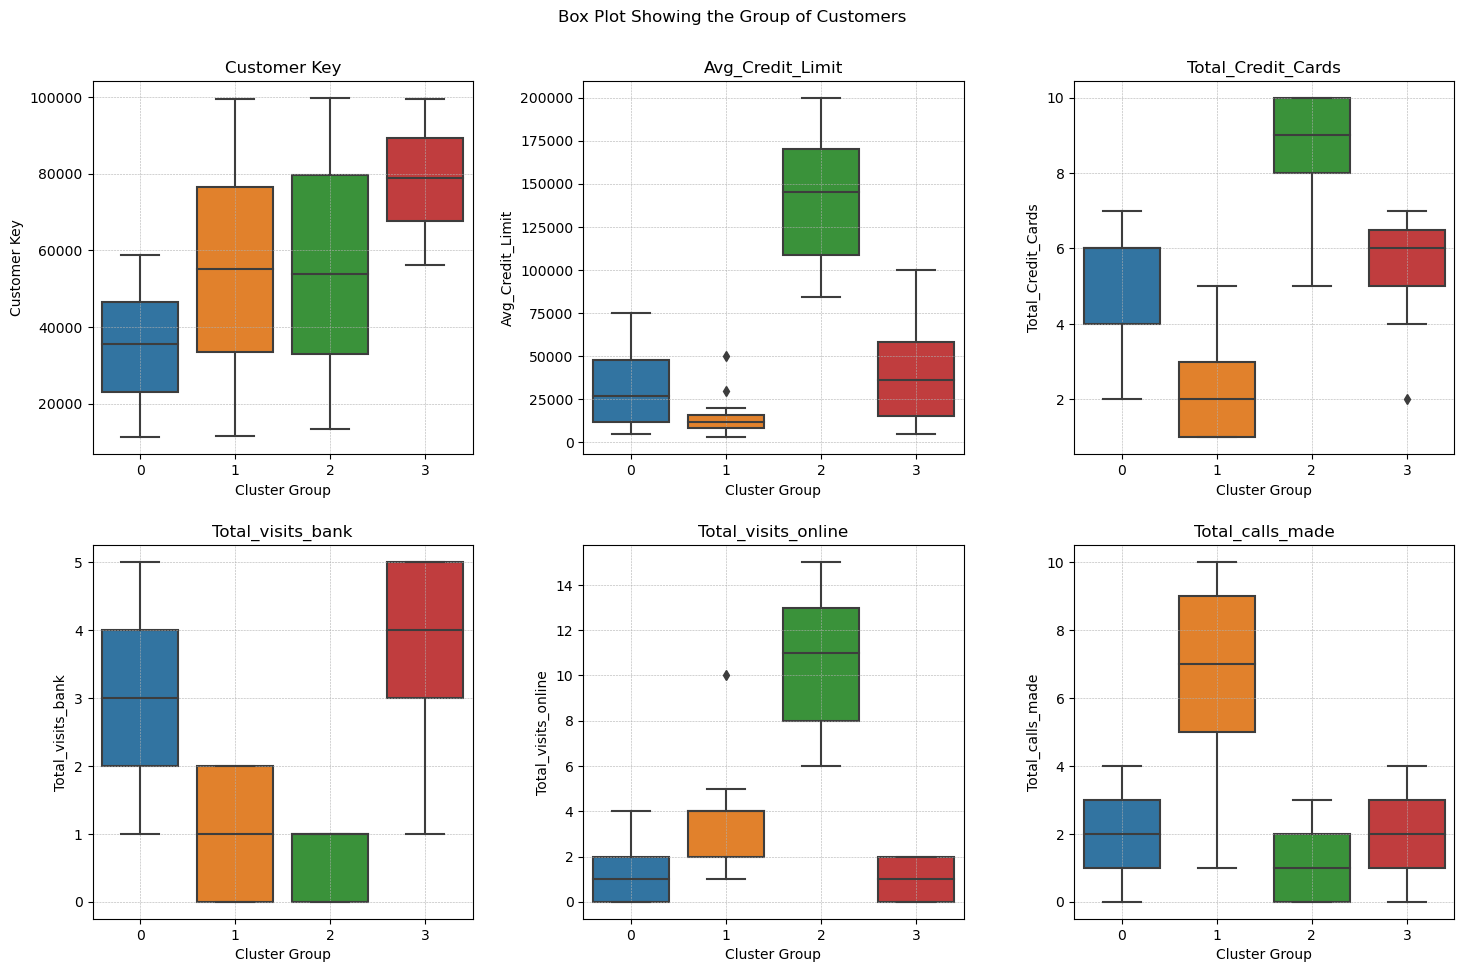

In [29]:
# Plotting the Clustering Patterns:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle("Box Plot Showing the Group of Customers")

# Flatten the axes array for iteration over the subplots
axes = axes.flatten()

for i,feature in enumerate(customer_data.columns):
    # Select the current subplot
    ax = axes[i]
    
    # Creating the boxplot
    sns.boxplot(x=customer_data_Km['Clusters'], y=customer_data_Km[feature], ax=ax)
    
    ax.set_xlabel('Cluster Group')
    # Setting individual title
    ax.set_title(feature)
    
    # Adding gridlines:
    ax.grid(linestyle='--',linewidth=0.4)

# Adjust the spacing between subplots
plt.tight_layout(pad=2.0)
plt.show()


#### KMeans Clustering Summary:
- Four clusters formed.
- Customers in cluster 2 had the most Average credit limit and Total number of credit cards.
- Customers in cluster 2 mostly contacted the bank via online channels.
- Cluster 1 had the least number of credit cards and credit limit and made the most aount of calls to the bank.
- Majority of the customers in clusters 0 and 3 made same number of calls, online visits, physical visits to the bank. They also had similar average credit limit and number of credit cards.
- Cluster 0 and 3 made the least online contact with the bank.

## DBSCAN Clustering:

#### Finding optimal eps value at min_samples of 3:

In [30]:
for i in [0.1,0.2,0.3,0.4]:
    evaluate = internal_measure_DBSCAN(data=customer_data_scaled,eps=i,min_samples=3)
    print("At eps:",i,evaluate)
    print('=========================================================================')

At eps: 0.1        Davies-Bouldin Index Silhouette Coeff Calinski Harabasz Score
Result                1.045           -0.368                   2.971
At eps: 0.2        Davies-Bouldin Index Silhouette Coeff Calinski Harabasz Score
Result                1.885           -0.186                  34.185
At eps: 0.3        Davies-Bouldin Index Silhouette Coeff Calinski Harabasz Score
Result                2.365            0.314                  41.334
At eps: 0.4        Davies-Bouldin Index Silhouette Coeff Calinski Harabasz Score
Result                0.912            0.412                 165.483


- eps of 0.4 gave the best metric.

In [31]:
internal_measure_DBSCAN(data=customer_data_scaled,eps=0.4,min_samples=3)

,Davies-Bouldin Index,Silhouette Coeff,Calinski Harabasz Score
Result,0.912,0.412,165.483


In [32]:
dbscan = DBSCAN(eps=0.4,min_samples=3)
clusters_db = dbscan.fit_predict(customer_data_scaled)
clusters_db

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
# Checking to see the clusters formed:
set(clusters_db)

{0, 1}

- 2 clusters were formed with DBSCAN.

In [34]:
Db_clusters_df = pd.DataFrame(clusters_db, columns=['Clusters'])
Db_clusters_df

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
655,1
656,1
657,1
658,1


In [35]:
customer_data_db = pd.concat([customer_data, Db_clusters_df], axis=1)
customer_data_db

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,1
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,1
656,60732,84000,10,1,13,2,1
657,53834,145000,8,1,9,1,1
658,80655,172000,10,1,15,0,1


#### Visualizing the Groups or Clusters:

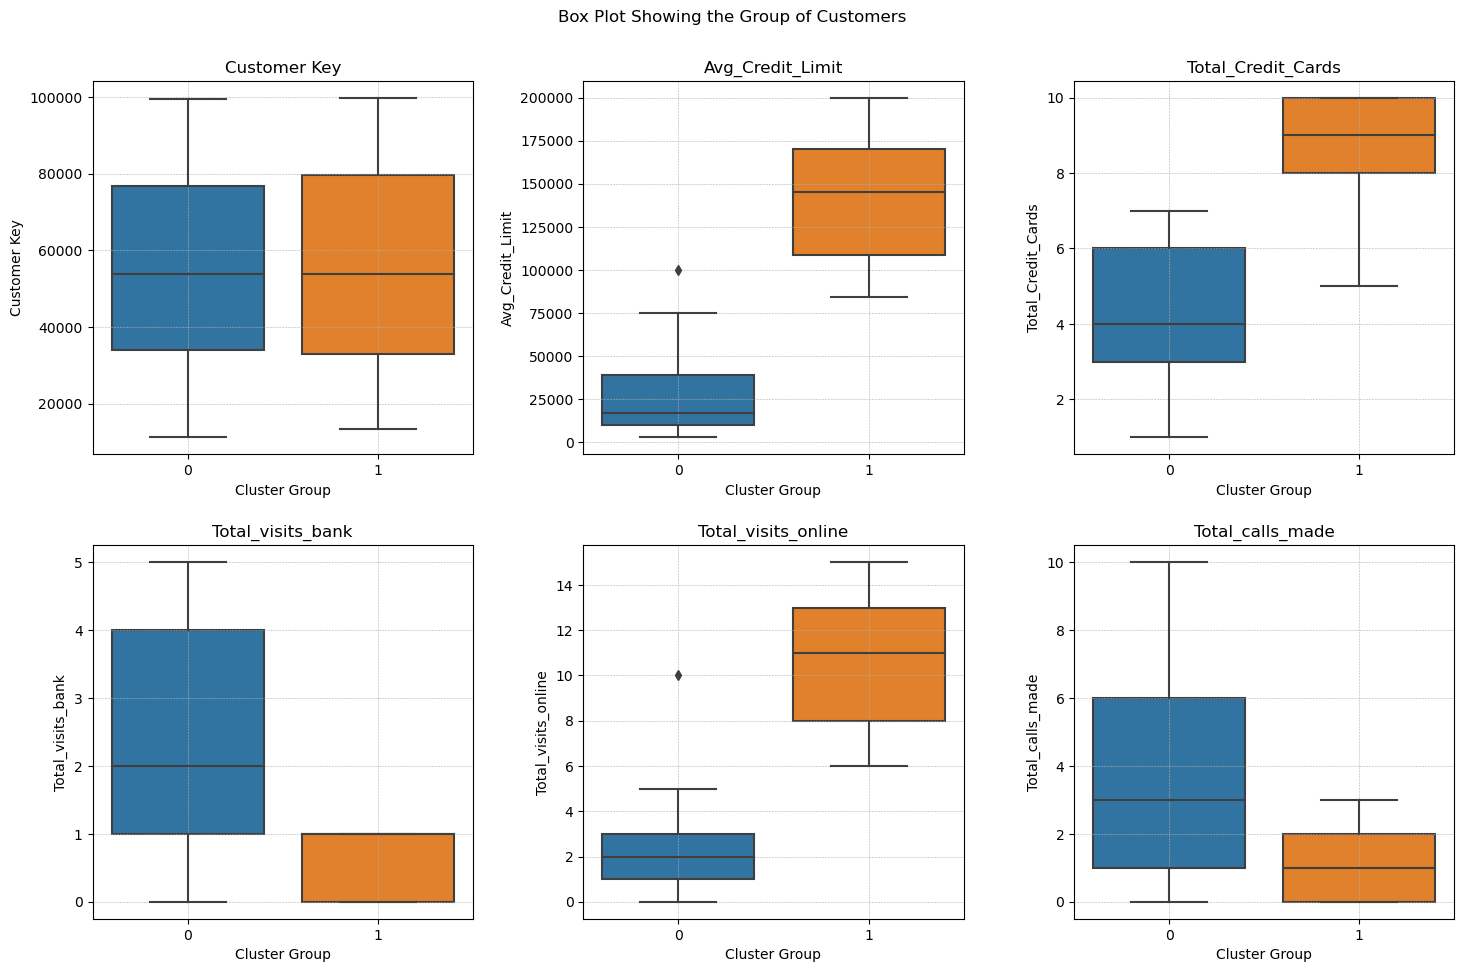

In [36]:
# Plotting the Clustering Patterns:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle("Box Plot Showing the Group of Customers")

# Flatten the axes array for iteration over the subplots
axes = axes.flatten()

for i,feature in enumerate(customer_data.columns):
    # Select the current subplot
    ax = axes[i]
    
    # Creating the boxplot
    sns.boxplot(x=customer_data_db['Clusters'], y=customer_data_db[feature], ax=ax)
    
    ax.set_xlabel('Cluster Group')
    # Setting individual title
    ax.set_title(feature)
    
    # Adding gridlines:
    ax.grid(linestyle='--',linewidth=0.4)

# Adjust the spacing between subplots
plt.tight_layout(pad=2.0)
plt.show()


#### DBSCAN Clustering Summary:
- Two groups formed.
- Cluster 1 contacted the bank mostly online.
- Cluster 1 had the highest Average Credit Limit as well as number of credit cards.
- cluster 0 paid more visits to the bank and also made the most calls to the bank.

## Comparing KMeans and DBSCAN Clustering:

In [37]:
KM_df = internal_measure_KMeans(data=customer_data_scaled, k=4)

In [38]:
DB_df = internal_measure_DBSCAN(data=customer_data_scaled,eps=0.4,min_samples=3)

In [39]:
# Putting evaluations in dataframe:
eval_cluster = pd.DataFrame({'Silhouette Coeff':[KM_df['Silhouette Coeff'].values[0], DB_df['Silhouette Coeff'].values[0]],\
             'Davies-Bouldin Index':[KM_df['Davies-Bouldin Index'].values[0], DB_df['Davies-Bouldin Index'].values[0]]},
            index = ['KMeans', 'DBSCAN'])

In [40]:
eval_cluster

,Silhouette Coeff,Davies-Bouldin Index
KMeans,0.348,1.049
DBSCAN,0.412,0.912


- DBSCAN clustering method performed better in grouping the customers because it had the highest Silhoutte coefficient of 0.412 and a low David-Bouldin index of 0.912, indicating good clusters.
- Recommendations will be made based on the DBSCAN clustering.

### Recommendations:

- Since the customers in cluster 0 contacts the bank the most (via calls and physical visits), they could be the customers having negative ratings for the bank's customer services due to possible delays in resolving their issues. Hence, the bank should focus on making these group happy, perhaps by ensuring their issues are treated with upmost priority.
- Also, by focusing on resolving their disputes faster and making them satisfied, these group (cluster 0) could, in turn, decide to upscale their average credit limit which will also be beneficial to the bank because as an increase in credit limit will also ensure customer retention and more profit for the bank.